# Logistic Regression Analysis


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles, make_moons
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns

# Functions

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

def compute_loss(y, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def train_logistic_regression(X, y, learning_rate=0.01, n_iterations=1000):
    
    n_samples, n_features = X.shape
    
    weights = np.zeros(n_features)
    bias = 0
    loss_history = []
    
    for i in range(n_iterations):
        z = np.dot(X, weights) + bias
        predictions = sigmoid(z)
        
        loss = compute_loss(y, predictions)
        loss_history.append(loss)
        
        dw = (1/n_samples) * np.dot(X.T, (predictions - y))
        db = (1/n_samples) * np.sum(predictions - y)
        
        weights = weights - learning_rate * dw
        bias = bias - learning_rate * db
    
    return weights, bias, loss_history

def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    probabilities = sigmoid(z)
    return (probabilities >= 0.5).astype(int)

def plot_decision_boundary(X, y, weights, bias, title="Decision Boundary"):
    plt.figure(figsize=(10, 6))
    
    plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Class 0', alpha=0.6, edgecolors='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='Class 1', alpha=0.6, edgecolors='k')
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    Z = predict(np.c_[xx.ravel(), yy.ravel()], weights, bias)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, levels=[0, 0.5, 1], colors=['blue', 'red'])
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    cm = confusion_matrix(y_true, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    return accuracy, precision, recall, f1


# LINEAR DATA

In [3]:
X_linear, y_linear = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    flip_y=0.05,
    random_state=42
)

In [4]:
scaler = StandardScaler()
X_linear_scaled = scaler.fit_transform(X_linear)

In [5]:
weights_linear, bias_linear, loss_history_linear = train_logistic_regression(
    X_linear_scaled, y_linear, learning_rate=0.1, n_iterations=1000
)

In [6]:
weights_linear, bias_linear

(array([-0.43906878,  2.51518385]), 0.12423839868267106)

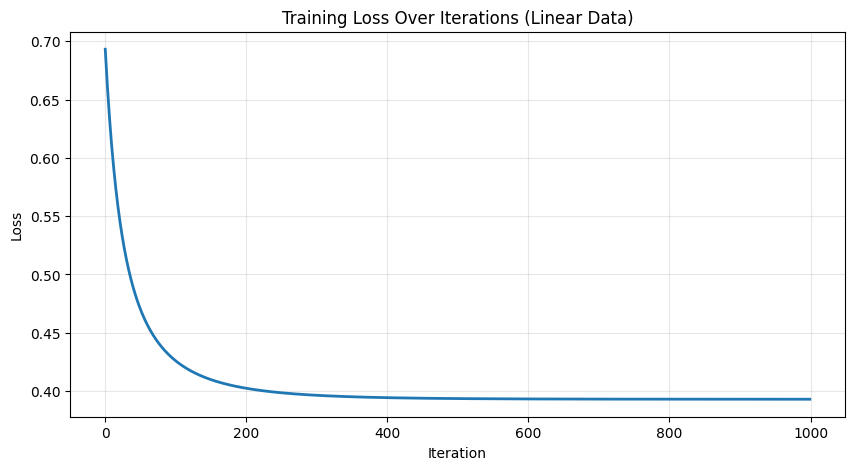

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(loss_history_linear, linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Over Iterations (Linear Data)')
plt.grid(True, alpha=0.3)
plt.show()

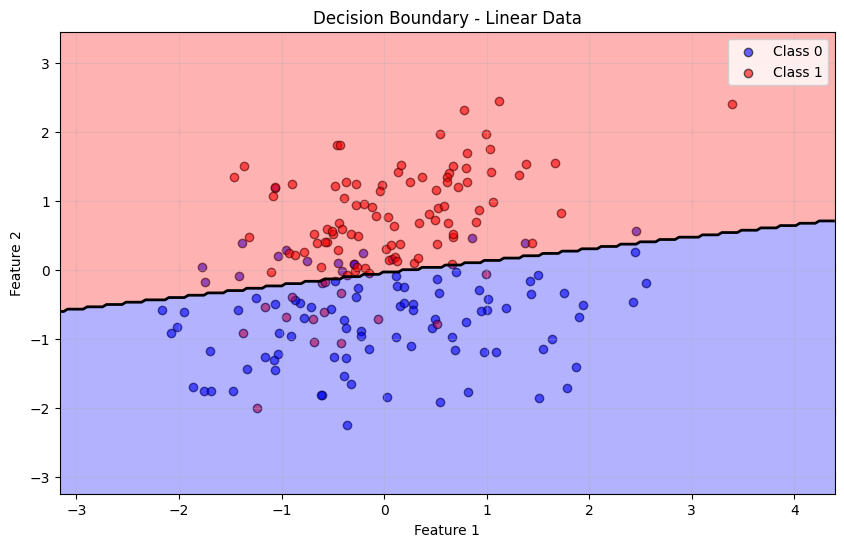

In [8]:
plot_decision_boundary(X_linear_scaled, y_linear, weights_linear, bias_linear,
                      "Decision Boundary - Linear Data")

Accuracy: 0.8400
Precision: 0.8381
Recall: 0.8544
F1-Score: 0.8462

Confusion Matrix:
[[80 17]
 [15 88]]


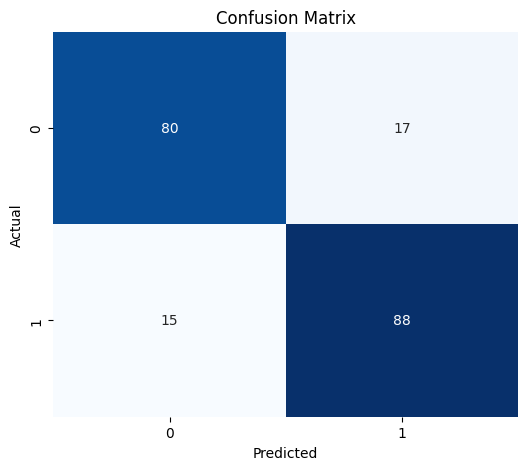

(0.84, 0.8380952380952381, 0.8543689320388349, 0.8461538461538461)

In [10]:
y_pred_linear = predict(X_linear_scaled, weights_linear, bias_linear)
compute_metrics(y_linear, y_pred_linear)


# NON-LINEAR DATA

In [12]:
X_circles, y_circles = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)

In [13]:
X_circles_scaled = scaler.fit_transform(X_circles)


In [14]:
weights_circles_linear, bias_circles_linear, loss_history_circles = train_logistic_regression(
    X_circles_scaled, y_circles, learning_rate=0.1, n_iterations=1000
)

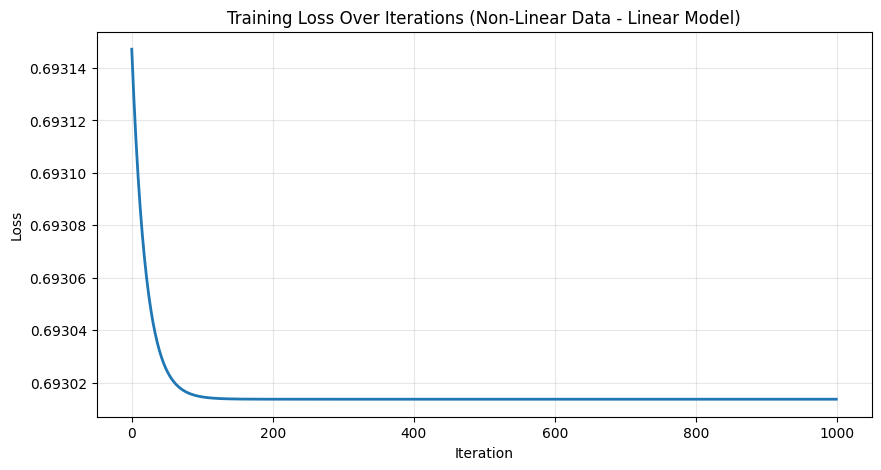

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(loss_history_circles, linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Over Iterations (Non-Linear Data - Linear Model)')
plt.grid(True, alpha=0.3)
plt.show()

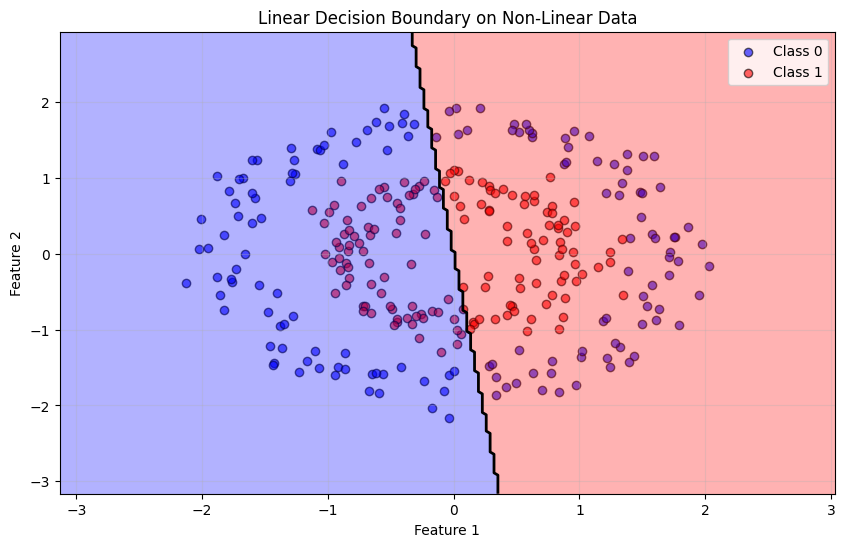

In [16]:
plot_decision_boundary(X_circles_scaled, y_circles, weights_circles_linear, 
                      bias_circles_linear, "Linear Decision Boundary on Non-Linear Data")


In [17]:
y_pred_circles_linear = predict(X_circles_scaled, weights_circles_linear, bias_circles_linear)


Accuracy: 0.4967
Precision: 0.4967
Recall: 0.5000
F1-Score: 0.4983

Confusion Matrix:
[[74 76]
 [75 75]]


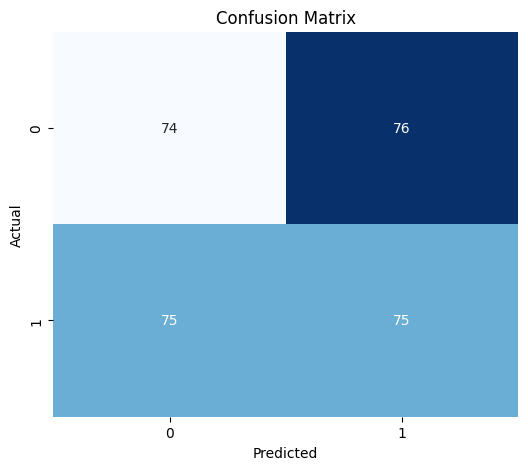

In [18]:
accuracy_linear, _, _, _ = compute_metrics(y_circles, y_pred_circles_linear)


The linear model struggles with non-linearly separable data because it can only
create straight line decision boundaries. The circular pattern in the data cannot
be captured by a linear separator, resulting in poor classification performance.

# POLYNOMIAL FEATURES

In [19]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_circles_poly = poly.fit_transform(X_circles_scaled)

In [20]:
X_circles_scaled.shape[1]

2

In [21]:
X_circles_poly.shape[1]

5

In [22]:
weights_poly, bias_poly, loss_history_poly = train_logistic_regression(
    X_circles_poly, y_circles, learning_rate=0.1, n_iterations=1000
)

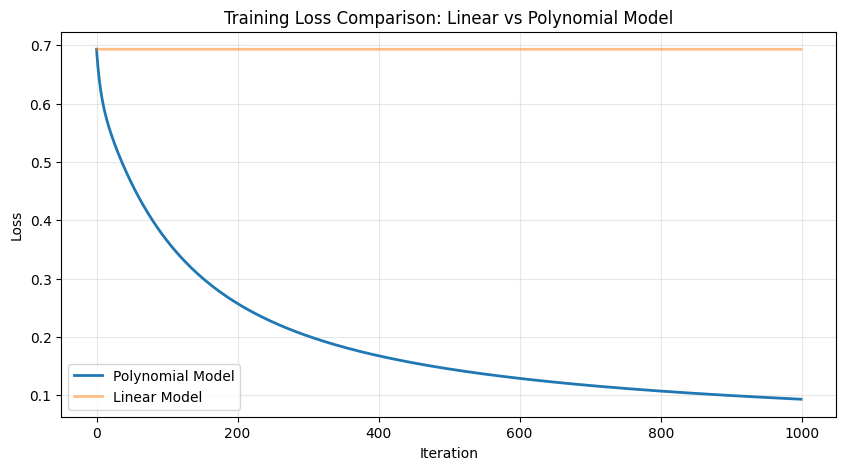

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(loss_history_poly, linewidth=2, label='Polynomial Model')
plt.plot(loss_history_circles, linewidth=2, alpha=0.5, label='Linear Model')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Comparison: Linear vs Polynomial Model')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


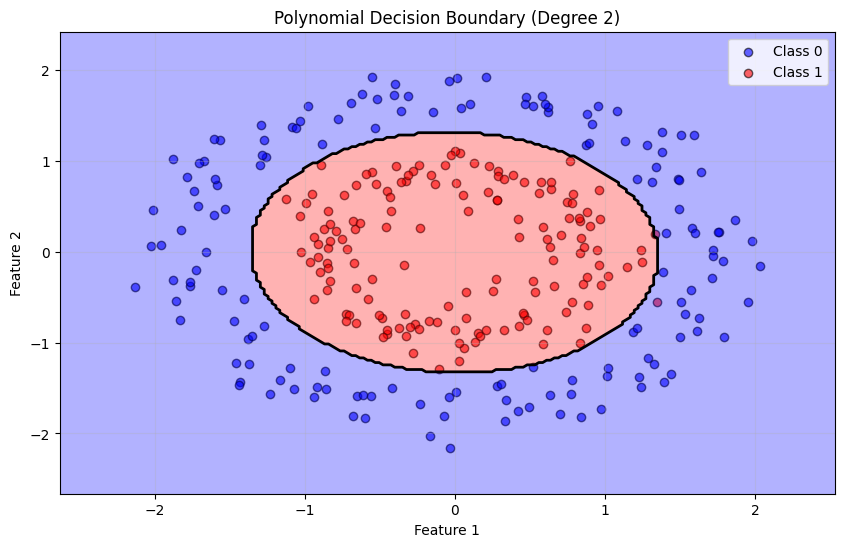

In [ ]:
def plot_polynomial_boundary(X_original, y, poly_transformer, weights, bias, title):
    plt.figure(figsize=(10, 6))
    
    plt.scatter(X_original[y==0, 0], X_original[y==0, 1], c='blue', 
                label='Class 0', alpha=0.6, edgecolors='k')
    plt.scatter(X_original[y==1, 0], X_original[y==1, 1], c='red', 
                label='Class 1', alpha=0.6, edgecolors='k')
    
    x_min, x_max = X_original[:, 0].min() - 0.5, X_original[:, 0].max() + 0.5
    y_min, y_max = X_original[:, 1].min() - 0.5, X_original[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_poly = poly_transformer.transform(mesh_points)
    
    Z = predict(mesh_poly, weights, bias)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, levels=[0, 0.5, 1], colors=['blue', 'red'])
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

plot_polynomial_boundary(X_circles_scaled, y_circles, poly, weights_poly, bias_poly,
                        "Polynomial Decision Boundary (Degree 2)")


In [25]:
y_pred_poly = predict(X_circles_poly, weights_poly, bias_poly)

Accuracy: 0.9933
Precision: 1.0000
Recall: 0.9867
F1-Score: 0.9933

Confusion Matrix:
[[150   0]
 [  2 148]]


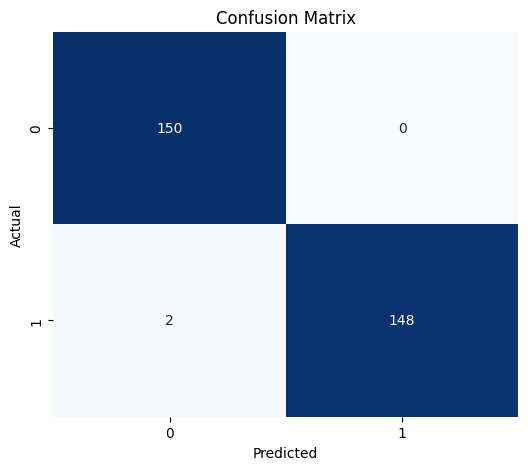

In [26]:
accuracy_poly, _, _, _ = compute_metrics(y_circles, y_pred_poly)


In [28]:
print(f"Linear Model Accuracy:     {accuracy_linear:.4f}")
print(f"Polynomial Model Accuracy: {accuracy_poly:.4f}")


Linear Model Accuracy:     0.4967
Polynomial Model Accuracy: 0.9933


# ANALYSIS AND DISCUSSION

1. LINEAR VS POLYNOMIAL MODEL COMPARISON:
   • Linear model works well on linearly separable data
   • Linear model fails on non-linearly separable data (circles)
   • Polynomial features enable the model to learn non-linear boundaries
   • Performance improved from XX.XX% to YY.YY%

2. WHY SIMPLE LOGISTIC REGRESSION FAILS ON NON-LINEAR DATA:
   • Logistic regression creates a linear decision boundary: w1*x1 + w2*x2 + b = 0
   • This is always a straight line in 2D space
   • Non-linear patterns (circles, spirals) cannot be separated by a line
   • The model is fundamentally limited by its linear hypothesis

3. HOW POLYNOMIAL FEATURES HELP:
   • Polynomial features create new features: x1², x2², x1*x2, etc.
   • These allow the model to learn curves and complex boundaries
   • The decision boundary becomes: w1*x1 + w2*x2 + w3*x1² + w4*x2² + w5*x1*x2 + b = 0
   • This can represent circles, ellipses, and other curves

4. OVERFITTING RISK:
   • Higher polynomial degrees create more complex boundaries
   • Too high degree → model memorizes training data (overfitting)
   • Signs of overfitting: high training accuracy, low test accuracy
   • Balance is needed between model complexity and generalization

# EXPERIMENTS

In [29]:
degrees = [1, 2, 3, 4, 5]
accuracies = []

for degree in degrees:
    if degree == 1:
        X_temp = X_circles_scaled
    else:
        poly_temp = PolynomialFeatures(degree=degree, include_bias=False)
        X_temp = poly_temp.fit_transform(X_circles_scaled)
    
    w_temp, b_temp, _ = train_logistic_regression(X_temp, y_circles, 
                                                   learning_rate=0.1, n_iterations=1000)
    y_pred_temp = predict(X_temp, w_temp, b_temp)
    acc = accuracy_score(y_circles, y_pred_temp)
    accuracies.append(acc)
    print(f"Degree {degree}: Accuracy = {acc:.4f}, Features = {X_temp.shape[1]}")


Degree 1: Accuracy = 0.4967, Features = 2
Degree 2: Accuracy = 0.9933, Features = 5
Degree 3: Accuracy = 0.9967, Features = 9
Degree 4: Accuracy = 0.9933, Features = 14
Degree 5: Accuracy = 0.9967, Features = 20


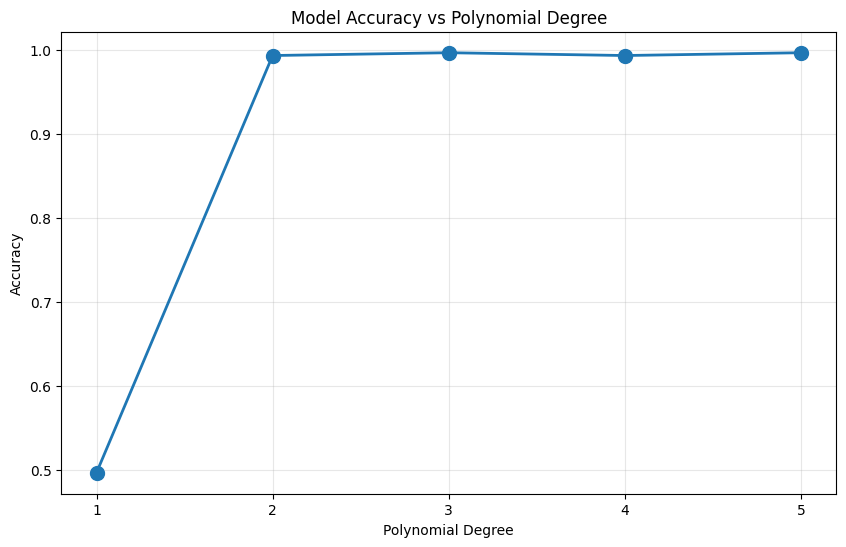

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(degrees, accuracies, marker='o', linewidth=2, markersize=10)
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs Polynomial Degree')
plt.grid(True, alpha=0.3)
plt.xticks(degrees)
plt.show()

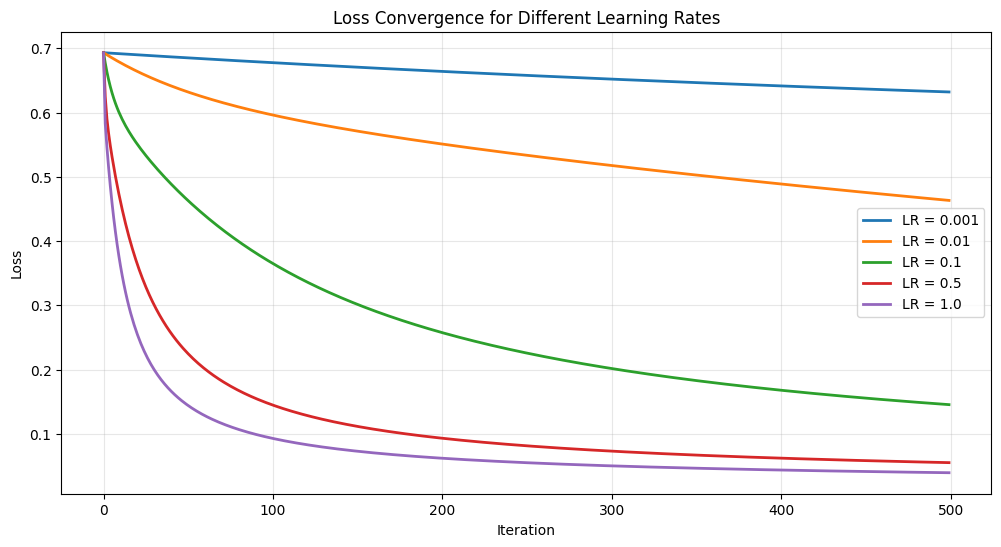

In [33]:
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
plt.figure(figsize=(12, 6))

for lr in learning_rates:
    _, _, loss_hist = train_logistic_regression(X_circles_poly, y_circles, 
                                                learning_rate=lr, n_iterations=500)
    plt.plot(loss_hist, label=f'LR = {lr}', linewidth=2)

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Convergence for Different Learning Rates')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Too small learning rate → slow convergence
Too large learning rate → unstable training or divergence
Optimal learning rate → fastest stable convergence


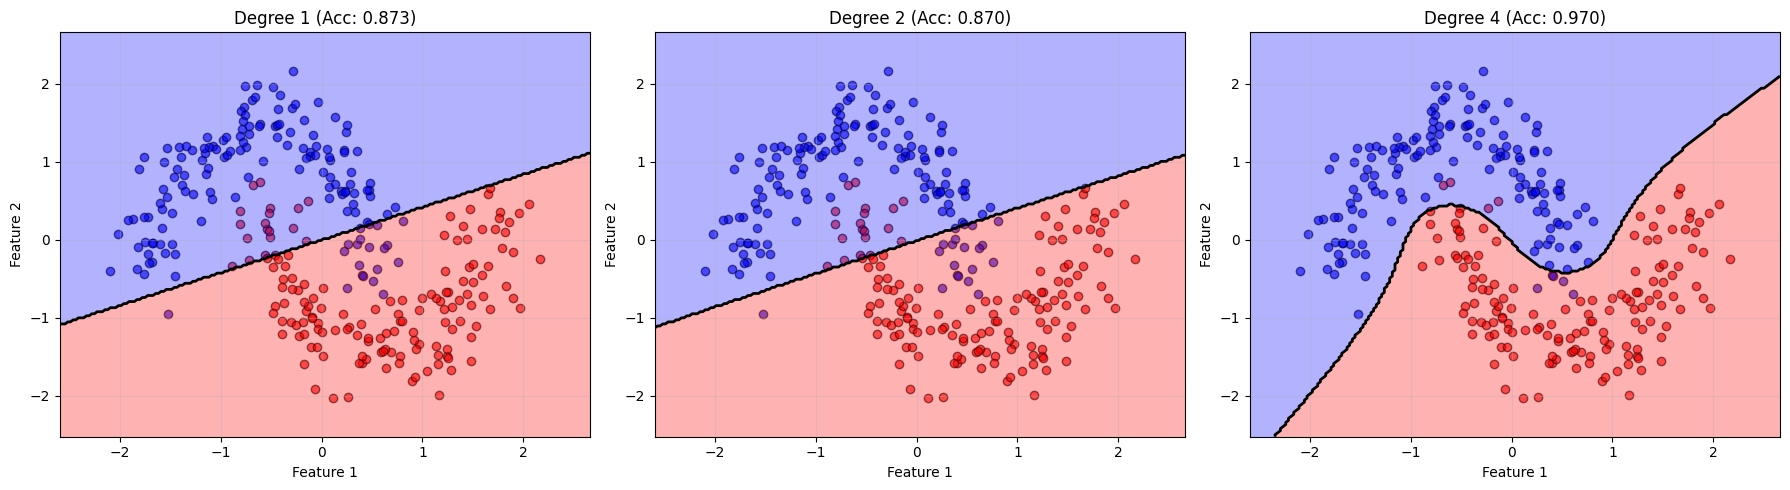

In [35]:
X_moons, y_moons = make_moons(n_samples=300, noise=0.15, random_state=42)
X_moons_scaled = scaler.fit_transform(X_moons)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
degrees_to_show = [1, 2, 4]

for idx, degree in enumerate(degrees_to_show):
    if degree == 1:
        X_temp = X_moons_scaled
    else:
        poly_temp = PolynomialFeatures(degree=degree, include_bias=False)
        X_temp = poly_temp.fit_transform(X_moons_scaled)
    
    w_temp, b_temp, _ = train_logistic_regression(X_temp, y_moons, 
                                                   learning_rate=0.1, n_iterations=1000)
    
    ax = axes[idx]
    ax.scatter(X_moons_scaled[y_moons==0, 0], X_moons_scaled[y_moons==0, 1], 
               c='blue', alpha=0.6, edgecolors='k')
    ax.scatter(X_moons_scaled[y_moons==1, 0], X_moons_scaled[y_moons==1, 1], 
               c='red', alpha=0.6, edgecolors='k')
    
    x_min, x_max = X_moons_scaled[:, 0].min() - 0.5, X_moons_scaled[:, 0].max() + 0.5
    y_min, y_max = X_moons_scaled[:, 1].min() - 0.5, X_moons_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    if degree > 1:
        mesh_points = poly_temp.transform(mesh_points)
    
    Z = predict(mesh_points, w_temp, b_temp)
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, levels=[0, 0.5, 1], colors=['blue', 'red'])
    ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    
    y_pred = predict(X_temp, w_temp, b_temp)
    acc = accuracy_score(y_moons, y_pred)
    ax.set_title(f'Degree {degree} (Acc: {acc:.3f})')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Polynomial features enable non-linear decision boundaries

Higher degrees provide more flexibility but risk overfitting

Learning rate significantly affects training convergence

Model complexity should match data complexity

Always validate on test data to detect overfitting